<a href="https://colab.research.google.com/github/avineses/PUC_DBDC/blob/main/Clase7/Clase7_1_Distribuciones_de_probabilidad_en_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 6: Distribuciones de probabilidad

**Autor:** Miguel Jorquera Viguera.<br>
**E-mail:** majorquev@gmail.com<br>
**Ayudante:** Rodrigo Morales<br>
**E-mail ayudante:** rumorale1@gmail.com

En R podemos obtener valores tanto de las funciones de densidad, distribución de probabilidad, cuantiles de una distribución o bien generar valores aleatorios de diversas distribuciones paramétricas.
Casi todas las distribuciones que se encuentran implementadas en la librería base de R se referencian de la misma manera.

* Funciones de densidad (PDFs) comienzan con la letra “d.”
* Funciones de distribución acumulada comienzan con la letra “p.”
* Funcioenes que retornan quantiles de una distribución comienzan con la letra “q.”
* Funciones que generan valores aleatorios comienzan con la letra“r.” 

Por defecto, en R contamos con una amplia variedad familias de distribuciones enre las que destacan las siguientes.



**Distribution**| **R name**| **additional arguments**
-----| -----| -----
beta |`beta` |shape1, shape2, ncp
binomial| `binom`| size, prob
Cauchy|`cauchy` |location, scale
chi-squared| `chisq`| df, ncp
exponential| `exp` |rate
F| `f` |df1, df2, ncp
gamma |`gamma` |shape, scale
geometric |`geom` |prob
hypergeometric| `hyper`| m, n, k
log-normal| `lnorm` |meanlog, sdlog
logistic |`logis` |location, scale
negative| `binomial`| nbinom size, prob
normal |`norm` |mean, sd
Poisson| `pois`| lambda
signed rank |`signrank`| n
Student’s t| `t`| df, ncp
uniform |`unif`| min, max
Weibull| `weibull`| shape, scale
Wilcoxon |`wilcox`|m, n




# I) Distribución normal

## Función de densidad
$$f(x) = \frac{1}{\sqrt{2 π \sigma^2}} e^{-\frac{1}{2\sigma^2}(x - \mu)^2}$$

## En R...

* `dnorm(x, mean = 0, sd = 1, log = FALSE)`: Evalúa la función de densidad.
* `pnorm(q, mean = 0, sd = 1, lower.tail = TRUE, log.p = FALSE)`: Calcula la probabilidad acumulada (función de distribución).
* `qnorm(p, mean = 0, sd = 1, lower.tail = TRUE, log.p = FALSE)`: Calcula los quantiles de la distribución. (Función inversa de la función de distribución de probabilidad).
* `rnorm(n, mean = 0, sd = 1)`: Genera muestras aleatroias.




**P1.** Se sabe que la estatura de la población adulta de sexo masculino chilena sigue una distribución normal con media 171,8 cms y una desviación estándar de 5cms

**a)** ¿Cuál es la probabilidad de encontrar de que una persona hombre  adulta tenga una estatura
menor o igual a 160 cms?

In [1]:
# pnorm()
#?pnorm
pnorm(160, mean = 171.8, sd = 5)
# Hay un 0.9% de probabilidad de que la persona mida menos de 1.60 mts.



[1] 0.009137468

In [2]:
?pnorm

  
**b)** ¿Cuál es la probabilidad de encontrar de que una persona adulta tenga una estatura mayor  a 160 cms?
  

In [27]:
#P(estatura > 160) = 1- P(estatura <= 160)
1- pnorm(160, mean = 171.8, sd = 5)

pnorm(160, mean = 171.8, sd = 5, lower.tail = F)
#NOTA 
# lower.tail 


[1] 0.9908625

[1] 0.9908625

**c)** ¿Cuál es la probabilidad de encontrar una persona con estatura entre 180cms y 190 cms?

In [ ]:
# P(est <= 190) - P(est <= 180) = P(180 <= est <= 190)
pnorm(190, mean = 171.8, sd = 5)

# Hay un xx% de probabilidad de encontrar una persona con estatura entre 180 y 190.

**d)** ¿Cuál es la estatura que corresponde al percentil 90?

In [5]:
qnorm(0.9, mean = 171.8, sd = 5)
# Cómo interpretamos este valor
# El 90% de las personas de género masculino,en chile, tiene una estatura menor o igual a 178.2 cms.

[1] 178.2078

**d)**  Genere una muestra aleatoria de tamaño 1000 y guárdela en un vector llamado _estaturas_, provenientes de una distribución normal con media 171,8 y desviación estandar igual a 5.

In [7]:
# estaturas
# Por si quiero replicar los mismos resultados pongo una semilla - > set.seed(666) (ejemplo)
estaturas <- rnorm(1000, mean = 171.8, sd = 5)
estaturas

[1] 176.2524 179.9813 173.4187 177.6553 171.1680 175.0204 173.8573 181.3919
   [9] 167.4906 173.8798 170.9243 179.5592 166.9886 173.5884 175.9248 179.1898
  [17] 164.9404 170.7341 180.1142 177.6084 165.3845 174.3908 176.0830 176.0708
  [25] 171.2991 171.5263 169.5755 165.6092 170.6285 170.7448 168.9944 172.9206
  [33] 168.2374 168.9360 160.7641 175.0754 177.0564 173.7462 170.1355 178.7830
  [41] 170.2753 170.1638 171.6622 163.7406 176.6210 173.6374 178.6129 170.1803
  [49] 171.4858 166.7242 172.6592 168.8389 174.8881 178.2739 169.3497 171.1915
  [57] 177.8878 167.7139 168.9140 172.8119 180.5162 171.6907 176.0135 169.8210
  [65] 180.2271 178.3470 173.0193 162.4094 170.4125 165.5726 173.9042 174.7462
  [73] 173.8138 173.2399 165.0992 165.6809 171.4975 168.1125 174.8349 174.3136
  [81] 182.2353 170.5429 176.8640 175.0389 165.0670 173.3188 171.5878 173.1666
  [89] 167.9659 173.1736 166.9621 179.2348 177.4110 176.8762 169.9779 166.8775
  [97] 177.1682 171.4931 170.4782 184.9474 164.8688 169.6595 178.4801 168.5140
 [105] 159.3878 172.1240 181.3754 177.7005 169.7099 179.4087 171.4986 171.2050
 [113] 169.0842 175.2698 179.6113 176.2527 186.0826 173.3735 174.9290 176.8476
 [121] 176.8494 173.7203 156.3834 167.5365 178.0614 166.6672 180.7785 167.6585
 [129] 177.7374 179.3960 172.2224 170.2951 177.6292 171.7244 178.3481 161.6774
 [137] 166.2528 175.3430 170.4325 166.9685 170.2785 171.0111 170.2344 170.1805
 [145] 174.6775 180.5445 180.9097 173.3279 175.3879 180.2839 169.2738 167.9962
 [153] 173.9867 171.5137 171.0241 173.9060 171.9716 168.8025 179.2506 179.6241
 [161] 166.1841 171.7021 175.1103 176.1491 169.6276 171.4701 172.5767 172.7353
 [169] 173.1653 170.1947 175.7538 183.8809 163.8786 173.0877 173.3311 166.6159
 [177] 168.4718 179.3857 174.9440 170.2107 162.1197 175.3569 168.6144 166.1571
 [185] 183.2207 169.5505 170.0221 171.4860 170.0468 165.7612 168.1425 165.4952
 [193] 172.2981 174.9638 186.6926 166.8265 175.8693 170.5894 163.1261 174.6472
 [201] 173.3035 173.7434 172.7715 180.6249 178.8875 167.8006 163.0955 173.5814
 [209] 172.2753 170.4238 173.8367 168.8283 172.2752 171.7737 177.4385 174.6511
 [217] 164.4052 163.1269 166.3570 173.1607 168.1376 163.3514 178.9208 165.8346
 [225] 169.4155 170.6956 171.5070 166.8666 172.6972 176.9689 175.7695 174.9559
 [233] 177.4932 172.8075 163.6489 170.7669 170.6232 173.7978 168.3386 169.8179
 [241] 177.2320 171.4835 172.3074 173.3449 166.9455 184.6437 175.3766 164.2982
 [249] 169.6305 168.8183 165.6079 173.1398 171.4219 166.7996 166.0582 172.7705
 [257] 182.0957 165.9845 171.8236 175.9153 177.7232 168.1029 177.6949 169.5742
 [265] 168.6605 172.7672 175.9969 166.9618 171.4128 167.0855 167.2070 174.0453
 [273] 171.1466 164.3719 170.7783 177.8636 160.5862 181.9113 174.4103 171.3874
 [281] 181.6055 159.8342 167.5401 169.9451 164.6116 173.0048 176.6287 175.4487
 [289] 173.2651 176.7302 174.6956 165.4693 165.3879 164.3687 171.1272 165.6167
 [297] 168.3694 175.6351 170.1222 166.9437 174.1296 164.9945 171.5116 169.6854
 [305] 173.4544 177.1950 163.0002 175.5812 180.7327 181.6645 172.0444 174.4331
 [313] 171.0789 175.9273 168.7744 171.0020 176.3984 164.0633 165.6743 173.1837
 [321] 178.6472 167.6182 178.1892 173.9053 171.0664 169.6145 175.8962 170.2029
 [329] 169.2915 172.0838 171.6287 173.0976 171.5466 177.8060 165.2462 158.5323
 [337] 174.0326 172.1079 175.3606 173.1671 176.8608 174.2539 172.2442 177.8129
 [345] 174.6636 167.7977 168.2515 177.1309 169.2873 173.5108 170.4440 170.9636
 [353] 171.0877 178.9969 168.8220 176.3338 175.8338 166.1179 169.1132 171.9676
 [361] 171.6261 180.5607 165.6838 170.6095 179.1421 172.1592 172.4737 161.4379
 [369] 170.3407 179.1077 170.4912 167.3103 172.7849 170.2248 177.2929 174.2191
 [377] 161.0785 168.6635 179.9459 167.0444 166.2812 166.1798 163.7482 171.9498
 [385] 167.2776 169.8195 179.5875 166.6609 174.8497 165.0116 171.1085 171.6513
 [393] 167.5511 175.0249 173.7494 175.4741 172.0887 173.9298 169.5696 177.1273
 [401] 174.8351 172.7056 171.9013 166.4930 170.2794 1

**e)** Mediante la función _hist()_ y la función _curve()_  genere un histograma de la muestra creada y añada la curva de distribución normal con la media y desviación estandar reales.

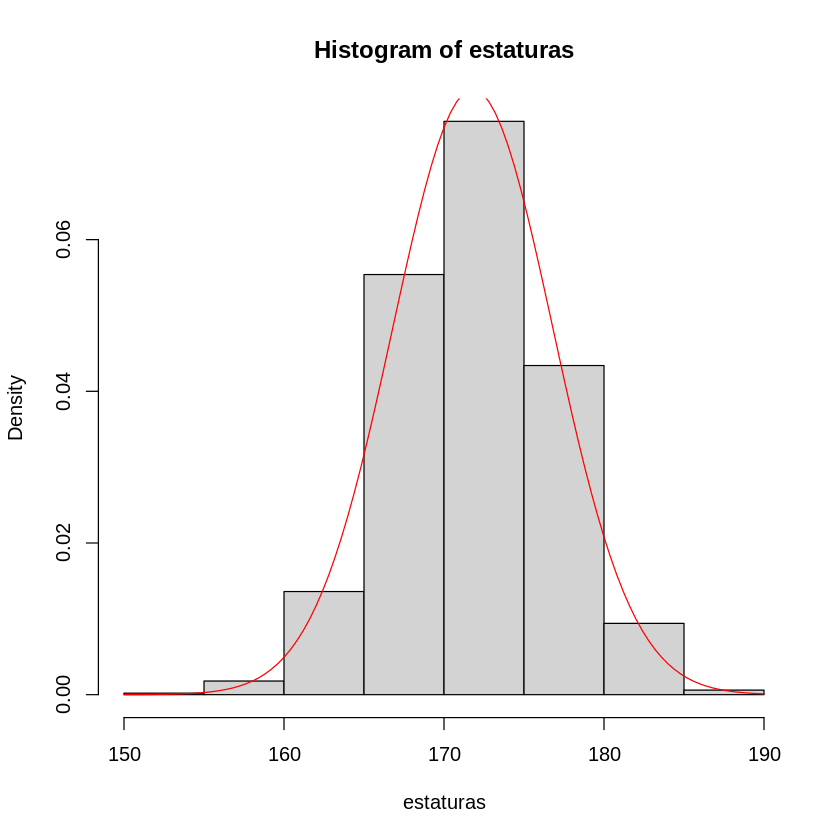

In [12]:
#hist es de Rbase
hist(estaturas, freq = F)
curve(dnorm(x, mean = 171.8, sd = 5), add = T, col = "red")
#siempre cuando usa las 2 funciones hist + curve. Esta ultima recibe una funcion y la va a evaluar en todo el eje x de la grafica anterior.

In [ ]:
## NOTA
# dnorm() evalúa la función de densidad en el argumento dado
dnorm(1.2, mean = 0, sd = 1) # evaluación de la densidad en el punto 1.2, de una distrib. normal con media 1 y sd 0.

In [14]:
#son buenos estimadores asumiendo una funcion normal
mu_est <- mean(estaturas)
sd_est <- sd(estaturas)

hist(estaturas)

In [ ]:
# Notar que en un histograma podemos visualizar los conteos o las frecuencias relativas.



In [ ]:
?hist

In [16]:
library(dplyr)
library(ggplot2)

In [ ]:
# Podemos realizar lo mismo con ggplot, aunque con un poco de dificultad adicional
df <- data.frame(est =  )

In [17]:
df %>%
  ggplot() +
  aes(x = est) +
  geom_histogram(
    bins = 16,
    fill = "white",
    color = "black") +
    aes(y = ..density..) +
  stat_function( fun = function(x){
    dnorm(x, mean = mu_est, sd = sd_est)
  }, col = "blue") +
  stat_function( fun = function(x){
    dnorm(x, mean = 171.8, sd = 5)
  }, col ="red") +
  geom_density(col = "green") #este último paso es decirle a R que lo calcule, segun Kernel, en base a la historia

ERROR: ignored

NOTA: Funciones en R
**bold text**
```
# This is formatted as code
```



In [20]:
g <- function(x,y){
  aux= x*y
  return(aux+10)
}

In [21]:
g(1,2)

[1] 12

# II)Distribucion binomial
## Contexto
Cuando una variable aleatoria representa la cantidad de éxitos en $n$ ensayos independientes de tipo Bernoulli (0 o 1), se dice que dicha variable sigue una distribución binomial.

## Función de probabilidad


$$p(x) = {n\choose x}p^x(1-p)^{n-x}$$
Donde $n$ es el total de ensayos realizados y $x$ es la cantidad de éxitos observados y $p$ es la probabilidad de éxito del evento de interés.

## En R...

* `dbinom(x, size, prob, log = FALSE)`: Evalúa la función de masa. En el caso discreto corresponde a la probabilidad del evento.
* `pbinom(q, size, prob, lower.tail = TRUE, log.p = FALSE)`: Calcula la probabilidad acumulada.
* `qbinom(p, size, prob, lower.tail = TRUE, log.p = FALSE)`: Retorna cuantiles de la distribución.
* `rbinom(n, size, prob)`: Genera muestras aleatorias.

**P2.** Suponga que un spot publicitario de un artículo tiene una tasa de efectividad de 20% sobre una determinada población.

**a)** Suponga que se logra llegar con el spot a 100 personas. ¿Cuál es la probabilidad de que 
 al menos 30  personas compren el artículo ofrecido?

In [28]:
# Identifiquemos algunos elementos como
# Experimento : Hacer llegar el spot a las 100 personas y registrar el número de clientes que efectivamente compraron el artículo.
# Variable aleatoria : X: "el número de clientes (de los 100) que compraron el artículo"
# Espacio muestral : {0,1,2,...,100}
#-------parámetros de pbinom ---------
#size (n): 100
#prob (p): 0.2

# Observaciòn sobre P(X >= 30)
pbinom(30, size = 100, prob = 0.2) # P(X <= 30) 

#Entonces para que se incluya la probabilidad del punto en x=30, se debe hacer de la siguiente manera: 
1-pbinom(29, size = 100, prob = 0.2)
pbinom(29, size = 100, prob = 0.2, lower.tail = FALSE) #equivalentement





[1] 0.9939407

[1] 0.01124898

[1] 0.01124898

[1] 5.827833e-07

In [ ]:
dbinom(1, size = 100, prob = 0.2)+ dbinom(2, size = 100, prob = 0.2)+dbinom(3, size = 100, prob = 0.2)


In [31]:
# ¿Cuál es la probabilidad de que exactamente 30 personas compren el artículo ofrecido?
dbinom(30, size = 100, prob = 0.2)
# ota alternativa
pbinom(30 , size = 100, prob = 0.2) - pbinom(29, size = 100, prob = 0.2)



[1] 0.005189643

[1] 0.005189643

**P3.** En una localidad se sabe que el 70% de las casas tienen un televisor.  Se quiere realizar una encuesta a 8 casas ¿cuál es la probabilidad de que 6 o más de ellas tengan televisor?

In [32]:
# size =  8
# prob = 0.7

1-pbinom(5, size = 8, prob = 0.7)

[1] 0.5517738

## Lanzando una moneda 
**P4** Supongamos que una **honesta** se lanza 14 veces y se anota el número veces que se obtuvo cara.

**a)** ¿Cuál es la probabilidad de obtener exactamente 4 caras? ¿y al menos 10?

In [35]:
#size = n = 14, y prob = p = 0.5 ?

dbinom(4, size = 14, prob= 0.5) #6% de prob de obtener 4 caras

pbinom(9, size = 14, prob = 0.5, lower.tail = F) #9% de prob de obtener al menos 10 caras.


[1] 0.06109619

[1] 0.08978271

  
**b)** Si se repite el experimento 5 veces. ¿Qué proporción de caras se debería esperar?¿y si se repite más veces?  Utillice la función rbinom para simular el experimento 1000 veces.

In [47]:
# simulamos un experimento binomial
N <- 1000
lanzamiento <- rbinom(1000, size = 14, prob = 0.5)

In [49]:
lanzamiento

[1]  8  9  7  9  5  8  7 10  6  9  6  4  6  8  7  5  6  6  9  9  6  7  9 10
  [25] 10  6  7  5  5  9  8  5 10  9  5  4  6  9  5  6  9  8  8  8  7  7  4  5
  [49]  6 12  7 10  9  6  8  4  5 11  6  9 11  7  8  4  9  6  7 10  8  7  6  8
  [73]  4  8  7  8  7  5  8 10  8  6  6  5  8  5  6  6  8  6 10  8  6  6  8  7
  [97]  7  8  6  4  9  8  6  6  5 10  5  9  3  4  9  6  5  8  7  9  8  5  6  8
 [121] 10  7  7  8  7  7  4  8  9  7  7  7  5  6  8  7  6  7  5  5  7  7  6  7
 [145]  3  8  6  9 10  8  5  7  7  8  9  5  5  8 10 10  9  7  7  6  8  5 10  3
 [169]  4  5  6  8  6  7  5 10  8  5  8  5  5  8  8  8  3  8  5  6  7  6  7  3
 [193]  8  8  8  5  4  4  5  3  8  9  4  5  5  7  9  8  7  6  7  6 12  6  6  8
 [217]  6  9  5  7 13  7 10  8  8 10  7  7  9  8  7  8  5  6  7  5  5  8 11  7
 [241]  9  6  5  7  8  7  8  5  6  6  7  6  7  9  4  5  7  4  6  9  7  8  5  6
 [265]  6  8  5 10  6  5 10  7  6  9  3  6  6  9  7  4  7  8  4  9  6  4  7  6
 [289]  8  7  7  8  5  8  4  9  8  9  9  8  8  3  5  7  7  6  8  5  7  9  7  6
 [313]  5  7  7  3  8  7  7  6  9  6  6  9  9  6  9  9 10  7  4  7  6  8  6  4
 [337]  4  9  9  5  6  6  6  5  2  7  7 10  8  7  9  7  7  7 10  8 10  9  5  8
 [361]  5 10 10  7  9  8  5  6 11 11  6  7  7  4  3  8  6  7  8  3  6  7  7  8
 [385]  7  7  6  7  3  5  7  9  7 10  6  8  2 10  5  7  4  5 11  9  6  5 12  7
 [409]  6  5 10  8  6  7  8  6  5 10  5  6  5  6  8  7  9  8  8  8 10 10  6  7
 [433]  9  5  6 11  5  6  6  4  7  4  5  9  8  4 10 11  7  7  4  8  6  8  9  4
 [457]  6  8  9  8  4  3  7  7  7  9  5  6  8  8  8  9 10  8  8  5  5  7  5  9
 [481]  6  6  9  5  9  8  8  7  5 11 10  7  5  6  6  9  6  6  9  6  9  4  6  7
 [505]  8  5  4 10  8  7  8  8  7  6  4  8  8  5  5  8  9  4  9 10 10  5  9  7
 [529]  7  7  8  7  8  3  9  7 11  9  6  8  7 10  5  5  9  8  6  8 10 10  6  4
 [553]  8  8  8  8  8  7  8  9  6  7  8  6  9  7  6  5  4 10  9  4  6  8  8  6
 [577] 11  9  7  6  6  7  7  5 11  7  6  5 11 10  8  4  5  8  9  6  8  7  9  7
 [601]  5  6 10  6  5  8  6  7  6  8  7  7 10  7  4  3 10  7  6 10  5  6 11  7
 [625]  6 10  9  9 11  7  8  7  8  5  7  9  6  7  8  6  4  4  6  8  7  9  4  5
 [649]  5  5 11 11  6  7  9  7  9  6  5 10  8  4  6  5  8  7  7 10  5 10  7  7
 [673]  9  7  7  3  7  6  8  7  7  6  6  6  9  4 11  7  6  9  6  6  4  9  5  9
 [697] 10  8  5  6  8  4 10  5  6 10  9  8  7  6  6  7  7  7  2  8  7  4  9  9
 [721]  9  5  5  6 10  9  6 10  7  6  6  6  6  6  6  9  8  8  6  5  6  8  8  6
 [745]  7  8  7  9  7  5  8  8  6  9  5  7  9  8  9  9  8  8  6  8  7  6  7  7
 [769]  4 10  5  7  6  7  8  7  7  5 11  5  6  3  6  9  8  6  5  5  8  2  6  7
 [793]  7  4  8  6  6  7  7  8  6  6  8  8  8  7  9  8  7  4  9  6  9  4  6  4
 [817] 10  4  6 10  7 12  7  7  7  5  9  9  6  6  6  5  2  8  8  5  7  8  8  6
 [841]  6 11  8  8  7  4  7  8  8  7  7  5 10  8  6  6  9  8  6  8  8  7  8  6
 [865]  4  5  4  6  7  8  3  4  7  5  5  6  7  8  5  9  7 10  7  7  8  6  6  9
 [889]  7  7  3  4 10  9  6 10  8  9  8  6  7  6  9  3  7 10  8  5  8  5  6 11
 [913]  7  6  7  7  9  4  9  8 11  8  9  5  7  7  8  5  9  5  6  6  8  8  7  7
 [937]  9  6  7  8  7  7  8  6  5  6  7  9  8  5  8  5  3  6  8 10  9  7  7 10
 [961]  5  7  6  8  4  5  5  8  7  5  6  8 10 11  3  5  6  4  6  8  7  6  8  7
 [985]  4  6  6  9  9  8  7  7  7  6  6  5  5  8  7  8

In [48]:
mean(lanzamiento)

[1] 6.992

In [50]:
# podemos construir un gráfico de barras con los conteos
df <- data.frame(caras   = lanzamiento)
head(df)


,caras
,<int>
1,8
2,9
3,7
4,9
5,5
6,8


In [55]:
experimento <- df %>%
                  group_by(caras) %>%
                  summarise(count = n(),
                        freq_obs = n()/N)%>%
                  mutate(freq_teorica = dbinom(caras, size = 14, prob = 0.5))        


In [ ]:
data.frame(caras = c(0,13,14),
          count = c(0,0,0),
          freq_obs = 0,
          freq_teorica = dbinom(c(0,13,14), size = 14, prob = 0.5))

In [ ]:
bind_rows(experimento, df_aux)

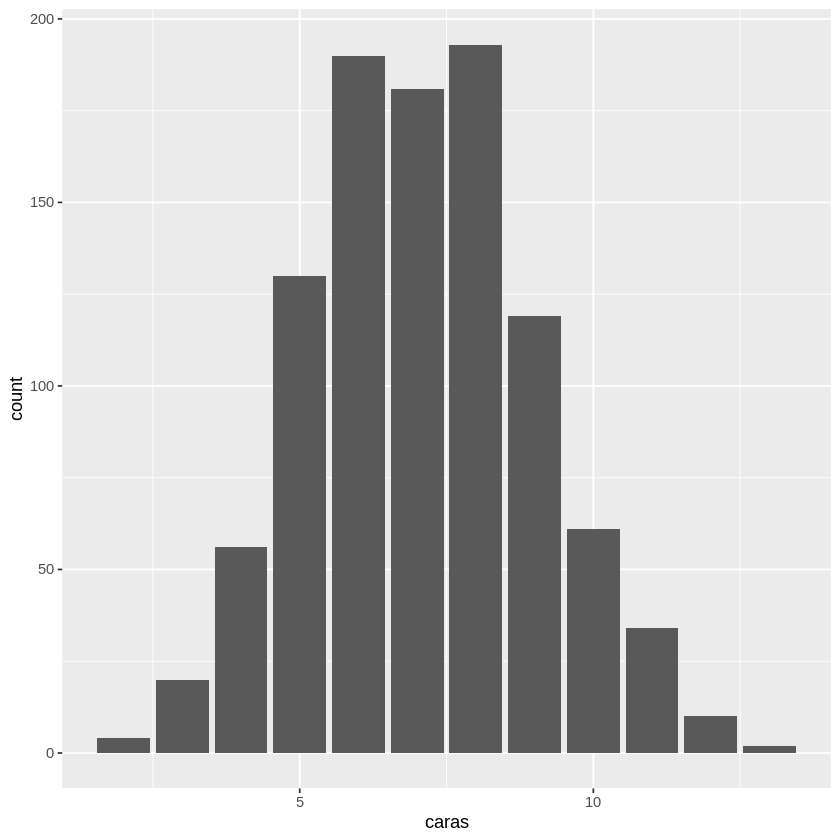

In [46]:
# gráfio ggplot 

df %>% 
    ggplot() +
    aes(x = caras) +
    geom_bar(stat = "count")



In [ ]:
# Pero si queremos visualizar las frecuencias relativas observadas?
# Adicionalmente nos interesaría poder visualizar la función de masa de probabilidad.


# III) Distribución poisson
## Contexto
Usualmente una variable aleatoria poisson, representa la cantidad de eventos registrados en un interval fijo de tiempo con una cierta tasa de ocurrencia.
## Función de probabilidad

$$p(x) = \lambda^x \dfrac{e^{-\lambda}}{x!}$$

Donde $\lambda$ corresponde a la tasa de ocurrencia y $x$ la cantida de eventos observados.

## Funciones en R
 * `dpois(x, lambda, log = FALSE)`
 * `ppois(q, lambda, lower.tail = TRUE, log.p = FALSE)`
 * `qpois(p, lambda, lower.tail = TRUE, log.p = FALSE)`
 * `rpois(n, lambda)`

** P5. ** Suponga que en un restaurant de comida se tiene una tasa de llegada de clientes de 2 clientes por cada 3 minutos en promedio. 
¿Cuál es la probabilidad de que 5 o más clientes lleguen en un período de 9 minutos?.


In [ ]:
# La tasa de éxito en una dist. poisson es el parámetro lambda 
# Dada la info, se tiene una tasa de 6 clientes cada 9 minutos






**P6.** Se sabe que la tasa de falla en la elaboración de ampolletas sigue una distribución poisson, con una tasa de falla de 3 ampolletas defectuosas por semana.
¿Cuál es la probabilidad de que al cabo de un mes se genere un total de 20 ampolletas defectuosas o más?



In [ ]:
# lambda = 3*4 = 12 ampolletas defectuosas por mes

